# Housing Sales Prediction

## Data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [37]:
import numpy as np
import pandas as pd

In [2]:
houses = pd.read_csv('data/home_data.csv')

In [3]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

# k Neaighrest Neighbours

In [8]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(houses.ix[:,3:], houses.price, random_state=0)

In [12]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1956,1,1.00,960,40946,1.0,0,0,5,5,960,0,1945,0,98014,47.6951,-121.864,1320,20350
15678,3,1.75,1510,9720,1.0,0,0,3,7,1510,0,1948,1976,98028,47.7728,-122.258,1520,10037
8729,3,2.25,1670,6414,1.0,0,0,4,8,1670,0,1961,0,98117,47.6921,-122.386,2130,7035
19064,3,2.00,2660,192099,1.0,0,0,4,9,2660,0,1964,0,98022,47.2098,-122.016,2570,43561
11291,3,1.75,1690,13500,1.0,0,0,4,7,1690,0,1978,0,98040,47.5897,-122.233,1950,10500


In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print('Train R^2: {}'.format(knn.score(X_train, y_train)))
print('Test R^2: {}'.format(knn.score(X_test, y_test)))

Train R^2: 0.7525551254011258
Test R^2: 0.47005495578499096


Try different number of neighbours in model

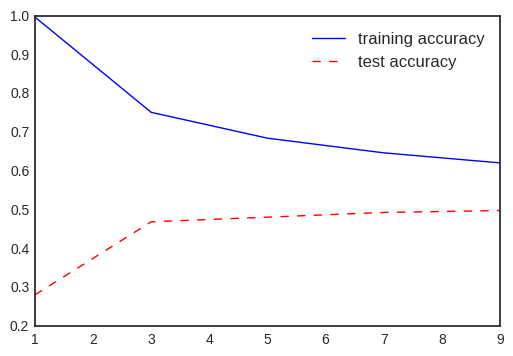

In [15]:
fig, ax = plt.subplots()

# train and test score stores
train_score = []
test_score = []

for neighbours in range(1, 10, 2):
    # build model
    knn = KNeighborsRegressor(n_neighbors=neighbours)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
# training accuracy
ax.plot(range(1, 10, 2), train_score, c='b', label='training accuracy')
ax.plot(range(1, 10, 2), test_score, c='r', ls='--', label='test accuracy')
ax.set(xlabel='n_neighbors',
      ylabel='accuracy')
ax.legend(loc='best')
plt.show()

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

Training accuracy: 0.7025634188388191
Test accuracy: 0.6900932118437848


In [21]:
def print_accuracy(clf):
    print('Training accuracy: {}'.format(clf.score(X_train, y_train)))
    print('Test accuracy: {}'.format(clf.score(X_test, y_test)))

print_accuracy(lr)

Training accuracy: 0.7025634188388191
Test accuracy: 0.6900932118437848


## Ridge Regression

In [20]:
from sklearn.linear_model import Ridge

In [22]:
ridge = Ridge().fit(X_train, y_train)
print_accuracy(ridge)

Training accuracy: 0.70256107773854
Test accuracy: 0.6901533802146819


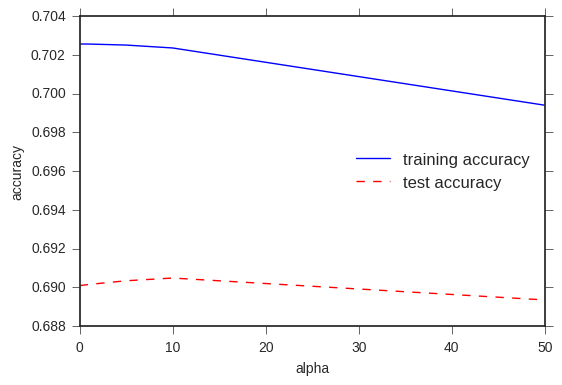

In [34]:
fig, ax = plt.subplots()

# train and test score stores
train_score = []
test_score = []
alpha_values = [0.00001, 0.1, 1, 5, 10, 50]
for alpha in alpha_values:
    # build model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    train_score.append(ridge.score(X_train, y_train))
    test_score.append(ridge.score(X_test, y_test))
# training accuracy
ax.plot(alpha_values, train_score, c='b', label='training accuracy')
ax.plot(alpha_values, test_score, c='r', ls='--', label='test accuracy')
ax.set(xlabel='alpha',
       ylabel='accuracy')
ax.legend(loc='best')
plt.show()

## Lasso

In [35]:
from sklearn.linear_model import Lasso

In [36]:
lasso = Lasso().fit(X_train, y_train)
print_accuracy(lasso)

Training accuracy: 0.7025634166277384
Test accuracy: 0.6900942640710999


/home/arnoldo/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [41]:
lasso = Lasso(alpha=10, max_iter=10000).fit(X_train, y_train)
print_accuracy(lasso)

Training accuracy: 0.7025631977308269
Test accuracy: 0.690103549959656


/home/arnoldo/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Gradient Boosting Machines

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)
print_accuracy(gbr)

Training accuracy: 0.9024642308255428
Test accuracy: 0.869876705243572


In [44]:
gbr.feature_importances_

array([ 0.00695152,  0.0201065 ,  0.10608878,  0.04779018,  0.00496075,
        0.03533083,  0.02723625,  0.01880715,  0.10204744,  0.04705762,
        0.02375389,  0.05097859,  0.01476563,  0.07503649,  0.22198129,
        0.09888576,  0.07668406,  0.02153728])

In [55]:
def plot_feature_importances(clf):
    fig, ax = plt.subplots()
    x = range(len(clf.feature_importances_))
    y = clf.feature_importances_
    ax.barh(x, y, align='center')
    ax.set(ylabel='features',
          xlabel='feature importances',
          yticks=x,
          yticklabels=X_train.columns)
    plt.show()

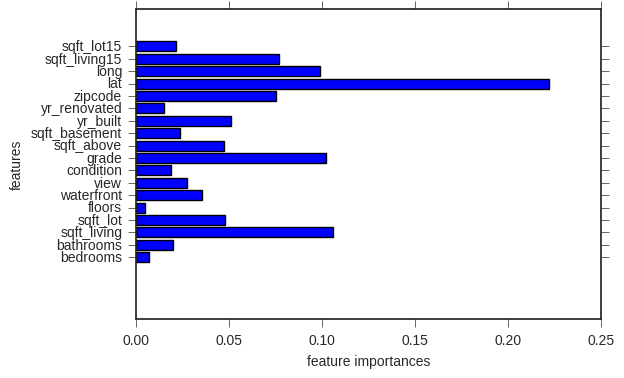

In [56]:
plot_feature_importances(gbr)

In [68]:
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=0)
gbr.fit(X_train, y_train)
print_accuracy(gbr)

Training accuracy: 0.9251166937492438
Test accuracy: 0.8903268584938682


In [61]:
gbr = GradientBoostingRegressor(learning_rate=0.01, random_state=0)
gbr.fit(X_train, y_train)
print_accuracy(gbr)

Training accuracy: 0.6038875428216242
Test accuracy: 0.5811005489364163


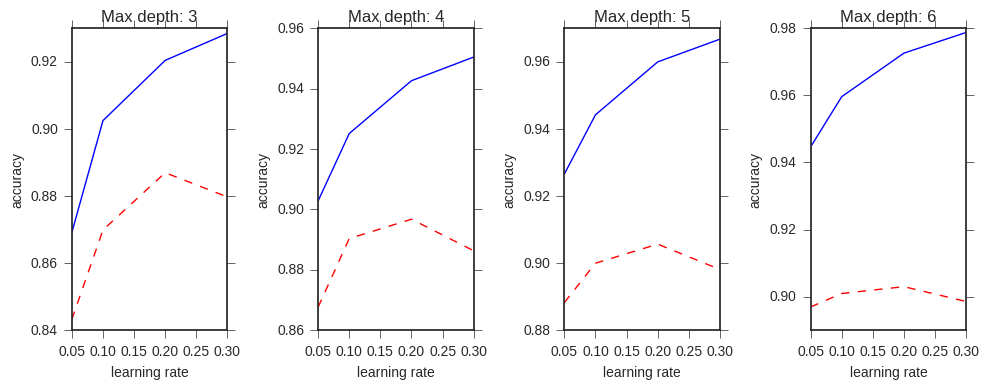

In [85]:
fig, axes = plt.subplots(ncols=4, figsize=(10, 4))

max_depth = range(3, 7)
learning_rates = [0.05, 0.1, 0.2, 0.3]

for depth, ax in zip(max_depth, axes):
    train_score = []
    test_score = []
    
    for learn in learning_rates:
        gbr = GradientBoostingRegressor(random_state=0, learning_rate=learn, max_depth=depth)
        gbr.fit(X_train, y_train)
        train_score.append(gbr.score(X_train, y_train))
        test_score.append(gbr.score(X_test, y_test))
    # train accuracy
    ax.plot(learning_rates, train_score, c='b', label='training accuracy')
    # test accuracy
    ax.plot(learning_rates, test_score, c='r', ls='--', label='test accuracy')
    ax.set(xlabel='learning rate', 
           ylabel='accuracy', 
           title='Max depth: {}'.format(depth))

fig.tight_layout()
plt.show()

In [86]:
gbr = GradientBoostingRegressor(learning_rate=0.2, n_estimators=200, max_depth=5, random_state=0)
gbr.fit(X_train, y_train)
print_accuracy(gbr)

Training accuracy: 0.9736608390299993
Test accuracy: 0.9076765643052398


In [88]:
gbr = GradientBoostingRegressor(learning_rate=0.2, n_estimators=100, max_depth=5, random_state=0)
gbr.fit(X_train, y_train)
print_accuracy(gbr)

Training accuracy: 0.9599654068171416
Test accuracy: 0.9056399485956392


## Kernerlized Support Vector Machines

In [89]:
from sklearn.svm import SVR

In [90]:
svm = SVR()
svm.fit(X_train, y_train)
print_accuracy(svm)

Training accuracy: -0.05882296032483092
Test accuracy: -0.05135792122588878
